## Basic plotting: bar charts and histograms with altair, matplotlib, and plotnine

ipython has "magic" commands, %pwd, %cd, which are intended to make life easier for humans, like showing our directory and letting us change directory.

In [1]:
# Let us first handle the preliminary imports
import pandas as pd
import altair as alt
import plotnine as p9

Note: you can import all of the functions
defined in a module with 
    from pandas import *
This means less typing (good for interactive programming)
but also obscures which code comes from which library.

![City of Chicago](city-of-chicago.jpg "Chicago logo")

In [45]:
salary=pd.read_csv("~/Downloads/Current_Employee_Names__Salaries__and_Position_Titles.csv")

In [46]:
salary.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,45.9
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN


In [47]:
len(salary)

30382

In [48]:
salary.dtypes

Name                  object
Job Titles            object
Department            object
Full or Part-Time     object
Salary or Hourly      object
Typical Hours        float64
Annual Salary        float64
Hourly Rate          float64
dtype: object

In [49]:
salary["Salary or Hourly"]

0        Salary
1        Salary
2        Salary
3        Hourly
4        Salary
          ...  
30377    Salary
30378    Salary
30379    Salary
30380    Salary
30381    Salary
Name: Salary or Hourly, Length: 30382, dtype: object

In [50]:
salary["Salary or Hourly"].value_counts()

Salary    23881
Hourly     6501
Name: Salary or Hourly, dtype: int64

In [51]:
salary[salary["Salary or Hourly"] == "Salary"]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN
6,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,118830.0,NaN
...,...,...,...,...,...,...,...,...
30377,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,90990.0,NaN
30378,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
30379,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,102372.0,NaN
30380,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN


In [52]:
salaried = salary[salary["Salary or Hourly"] == "Salary"]
hourly = salary[salary["Salary or Hourly"] == "Hourly"]

In [53]:
print(len(salaried))
print(len(hourly))

23881
6501


In [ ]:
len(salary)

<AxesSubplot:>

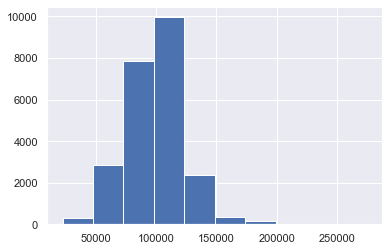

In [54]:
salary["Annual Salary"].hist()

(array([3.120e+02, 2.862e+03, 7.848e+03, 9.964e+03, 2.376e+03, 3.570e+02,
        1.380e+02, 2.100e+01, 1.000e+00, 2.000e+00]),
 array([ 22248. ,  47523.6,  72799.2,  98074.8, 123350.4, 148626. ,
        173901.6, 199177.2, 224452.8, 249728.4, 275004. ]),
 <BarContainer object of 10 artists>)

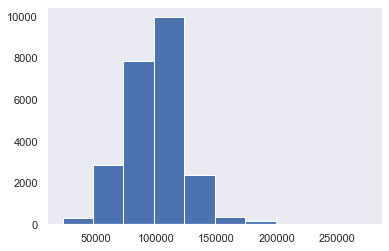

In [55]:
plt.hist(salaried["Annual Salary"])

In [56]:
salary["Annual Salary fix"] = pd.to_numeric(salary["Annual Salary"].str.replace(",", ""))

AttributeError: Can only use .str accessor with string values!

In [ ]:
pd.to_numeric(salary["Annual Salary"].str.replace(",", ""))

In [ ]:
salary["Annual Salary fix"].dtype

In [ ]:
plt.hist(salary["Annual Salary fix"])

In [ ]:
plt.hist(salary["Annual Salary fix"], bins=30)

Text(0.5, 0, 'Annual salary, $')

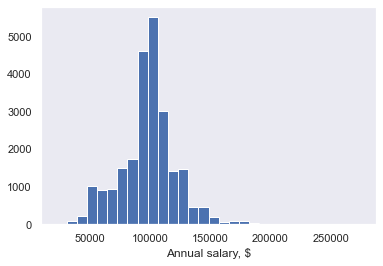

In [57]:
plt.hist(salary["Annual Salary"], bins=30)
plt.xlabel("Annual salary, $")

Text(0.5, 0, 'Annual salary, $')

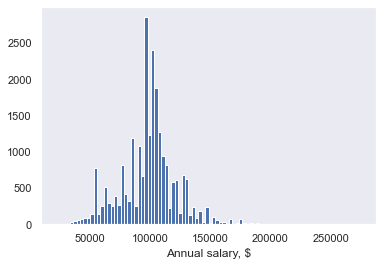

In [58]:
plt.hist(salary["Annual Salary"], bins=90)
plt.xlabel("Annual salary, $")

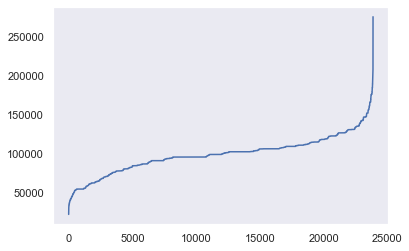

In [61]:
import numpy as np
plt.plot(np.arange(len(salary)), salary.sort_values("Annual Salary")["Annual Salary"]) 

In [67]:
a = pd.to_numeric(salary["Hourly Rate"].str.replace(",", ""))
a.head()

AttributeError: Can only use .str accessor with string values!

In [66]:
import altair as alt
alt.Chart(salary[0:5000]).mark_bar().encode(alt.X("Annual Salary fix:Q", bin=True), y="count()")

alt.Chart(...)

In [ ]:
salary[0:1000]

In [ ]:
salaried = salary[salary["Salary or Hourly"] == "Salary"]
hourly = salary[salary["Salary or Hourly"] == "Hourly"]

In [ ]:
alt.Chart(salaried[0:10]).mark_bar().encode(alt.X("Annual Salary:Q", bin=True), alt.Y("count()"))

In [ ]:
# And if I want more resolution, I replace bin=True with  bin=alt.Bin(maxbins=N)

In [ ]:
salaried["Annual Salary fix"]

In [ ]:
salary["Department"].value_counts()

In [ ]:
import altair as alt
alt.Chart(salary[0:1000]).mark_bar().encode(alt.X("Annual Salary fix:Q", bin=True), y="count()", color="Department")

In [ ]:
topdepts = salary["Department"].value_counts()[0:9]

In [ ]:
topdepts

In [63]:
alt.Chart(salary[0:1000]).mark_bar().encode(alt.X("Annual Salary fix:Q", bin=alt.Bin(maxbins=30)), y="count()", color="Department")

alt.Chart(...)

In [64]:
topdepts = salary["Department"].value_counts()[0:9]

In [ ]:
topdepts


In [ ]:
topdepts.index

In [ ]:
deptwhitelist = set (topdepts.index)

In [ ]:
"PUBLIC LIBRARY" in deptwhitelist


In [ ]:
"HOGWARTS" in deptwhitelist

In [ ]:
"BOARD OF ETHICS" in deptwhitelist

In [ ]:
salary["Department_clean"] = salary["Department"]

In [65]:
for i in salary.index:
    if i < 10:
        print(salary.Department_clean[i])
    if salary.Department_clean[i] not in deptwhitelist:
        salary.Department_clean[i] = "OTHER"


AttributeError: 'DataFrame' object has no attribute 'Department_clean'

In [ ]:
salary.Department.value_counts()

In [ ]:
salary.Department_clean.value_counts()

In [62]:
alt.Chart(salary[0:5000]).mark_bar().encode(alt.X("Annual Salary fix:Q", bin=alt.Bin(maxbins=30)), y="count()", color="Department_clean")

ValueError: Department_clean encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.Chart(...)